In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
# Load your dataset (adjust path as necessary)
normal_data = pd.read_excel('normal_data.xlsx')
seizure_data = pd.read_excel('epilepsy_with_seizure_data.xlsx')
no_seizure_data = pd.read_excel('epilepsy_without_seizure_data.xlsx')

# Concatenate the datasets and create labels
# Assuming the data is structured appropriately in columns
X = pd.concat([normal_data, seizure_data, no_seizure_data], axis=0).values
y = np.concatenate([np.zeros(len(normal_data)), np.ones(len(seizure_data)), np.zeros(len(no_seizure_data))])

# Convert the labels to categorical for multi-class classification
y = to_categorical(y, num_classes=3)

# Split the dataset into training and validation sets
xtrain_1dlstm, xval_1dlstm, ytrain_1dlstm, yval_1dlstm = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data to fit the model input shape (samples, timesteps, features)
xtrain_1dlstm = xtrain_1dlstm.reshape(xtrain_1dlstm.shape[0], xtrain_1dlstm.shape[1], 1)
xval_1dlstm = xval_1dlstm.reshape(xval_1dlstm.shape[0], xval_1dlstm.shape[1], 1)

# Save splits as .npy files
np.save('xtrain_1dlstm.npy', xtrain_1dlstm)
np.save('ytrain_1dlstm.npy', ytrain_1dlstm)
np.save('xval_1dlstm.npy', xval_1dlstm)
np.save('yval_1dlstm.npy', yval_1dlstm)

print("✅ Data preprocessing and saving splits completed!")


✅ Data preprocessing and saving splits completed!


In [ ]:
import pandas as pd

# Load the three datasets
normal_data = pd.read_excel('normal_data.xlsx')
seizure_data = pd.read_excel('epilepsy_with_seizure_data.xlsx')
no_seizure_data = pd.read_excel('epilepsy_without_seizure_data.xlsx')

# Check the first few rows to confirm the data format
print(normal_data.head())
print(seizure_data.head())
print(no_seizure_data.head())


  File Name                                            Content
0  Z001.txt  12\n22\n35\n45\n69\n74\n79\n78\n66\n43\n33\n36...
1  Z002.txt  -56\n-50\n-64\n-91\n-135\n-140\n-134\n-114\n-1...
2  Z003.txt  -37\n-22\n-17\n-24\n-31\n-20\n-5\n14\n31\n31\n...
3  Z004.txt  -31\n-43\n-39\n-39\n-9\n-5\n18\n7\n-12\n-42\n-...
4  Z005.txt  14\n26\n32\n25\n16\n8\n8\n12\n11\n19\n23\n24\n...
  File Name                                            Content
0  S001.txt  100\n124\n153\n185\n210\n220\n216\n222\n240\n2...
1  S002.txt  340\n353\n400\n470\n538\n590\n611\n629\n649\n6...
2  S003.txt  -310\n93\n494\n789\n798\n552\n202\n-95\n-262\n...
3  S004.txt  84\n75\n21\n-68\n-138\n-184\n-197\n-186\n-155\...
4  S005.txt  343\n311\n284\n274\n260\n237\n165\n-33\n-271\n...
  File Name                                            Content
0  N001.TXT  -42\n-39\n-35\n-35\n-36\n-37\n-37\n-39\n-36\n-...
1  N002.TXT  50\n48\n45\n41\n47\n51\n53\n40\n37\n25\n13\n-5...
2  N003.TXT  -54\n-56\n-57\n-63\n-60\n-53\n-43\n-29\n-2

In [ ]:
import pandas as pd
import numpy as np

# Function to preprocess EEG data and create labels
def preprocess_data(df, label):
    # Remove rows with empty strings or NaN in the 'Content' column
    df = df[df['Content'].str.strip() != '']

    # Extract EEG content and convert it into a NumPy array of floats
    eeg_signals = df['Content'].apply(lambda x: np.array([float(i) if i else 0.0 for i in x.split('\n')]))

    # Convert the EEG signals to a 3D array (samples, time_steps, features)
    x_data = np.array([signal for signal in eeg_signals], dtype=np.float32)

    # Reshape the data to match (samples, time_steps, features), assuming each signal has the same length
    x_data = np.reshape(x_data, (x_data.shape[0], x_data.shape[1], 1))  # Reshaping for LSTM

    # Create corresponding labels (one-hot encoding)
    y_labels = np.array([label] * x_data.shape[0], dtype=np.float32)

    return x_data, y_labels

# Process each dataset and assign labels
x_normal, y_normal = preprocess_data(normal_data, [0, 0, 1])  # Normal data label [0, 0, 1]
x_seizure, y_seizure = preprocess_data(seizure_data, [1, 0, 0])  # Seizure data label [1, 0, 0]
x_no_seizure, y_no_seizure = preprocess_data(no_seizure_data, [0, 1, 0])  # No Seizure label [0, 1, 0]

# Combine the data from all three categories
x_data = np.concatenate([x_normal, x_seizure, x_no_seizure], axis=0)
y_data = np.concatenate([y_normal, y_seizure, y_no_seizure], axis=0)

print(f"x_data shape: {x_data.shape}, y_data shape: {y_data.shape}")

# Split the data into training and validation sets
from sklearn.model_selection import train_test_split

xtrain_1dlstm, xval_1dlstm, ytrain_1dlstm, yval_1dlstm = train_test_split(x_data, y_data, test_size=0.2, random_state=42)

print(f"xtrain_1dlstm shape: {xtrain_1dlstm.shape}, ytrain_1dlstm shape: {ytrain_1dlstm.shape}")
print(f"xval_1dlstm shape: {xval_1dlstm.shape}, yval_1dlstm shape: {yval_1dlstm.shape}")


x_data shape: (500, 4098, 1), y_data shape: (500, 3)
xtrain_1dlstm shape: (400, 4098, 1), ytrain_1dlstm shape: (400, 3)
xval_1dlstm shape: (100, 4098, 1), yval_1dlstm shape: (100, 3)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
model_1dlstm = Sequential()

# 1D CNN layers
model_1dlstm.add(Conv1D(filters=64, kernel_size=7, activation='relu', input_shape=(4098, 1)))
model_1dlstm.add(BatchNormalization())
model_1dlstm.add(MaxPooling1D(pool_size=2))
model_1dlstm.add(Dropout(0.3))

model_1dlstm.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model_1dlstm.add(BatchNormalization())
model_1dlstm.add(MaxPooling1D(pool_size=2))
model_1dlstm.add(Dropout(0.3))

# LSTM layer
model_1dlstm.add(LSTM(64, return_sequences=False))
model_1dlstm.add(Dropout(0.3))

# Dense layers
model_1dlstm.add(Dense(64, activation='relu'))
model_1dlstm.add(Dropout(0.3))
model_1dlstm.add(Dense(3, activation='softmax'))  # 3 classes

# Compile the model
model_1dlstm.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Summary
model_1dlstm.summary()


C:\Users\dhars\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)                    │ (None, 4092, 64)            │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 4092, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_4 (MaxPooling1D)       │ (None, 2046, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 2046, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 2042, 128)           │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 2042, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_5 (MaxPooling1D)       │ (None, 1021, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 1021, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 96,131 (375.51 KB)

 Trainable params: 95,747 (374.01 KB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history_1dlstm = model_1dlstm.fit(
    xtrain_1dlstm, ytrain_1dlstm,
    epochs=50,
    batch_size=32,
    validation_data=(xval_1dlstm, yval_1dlstm),
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.5137 - loss: 0.9569 - val_accuracy: 0.1000 - val_loss: 1.8555
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.6501 - loss: 0.7084 - val_accuracy: 0.1000 - val_loss: 2.4604
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.7376 - loss: 0.6001 - val_accuracy: 0.1900 - val_loss: 2.1975
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 997ms/step - accuracy: 0.6952 - loss: 0.6740 - val_accuracy: 0.2900 - val_loss: 1.5866
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.7492 - loss: 0.5401 - val_accuracy: 0.4500 - val_loss: 1.0892
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.7871 - loss: 0.5140 - val_accuracy: 0.5900 - val_loss: 0.9161
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.7591 - loss: 0.5479 - val_accuracy: 0.7500 - val_loss: 0.7124
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 13s 998ms/step - accuracy: 0.8199 - loss: 0.4503 - val_accuracy: 0.5800 - val

In [ ]:
model_1dlstm.save("eeg_1dcnn_lstm_model.h5")


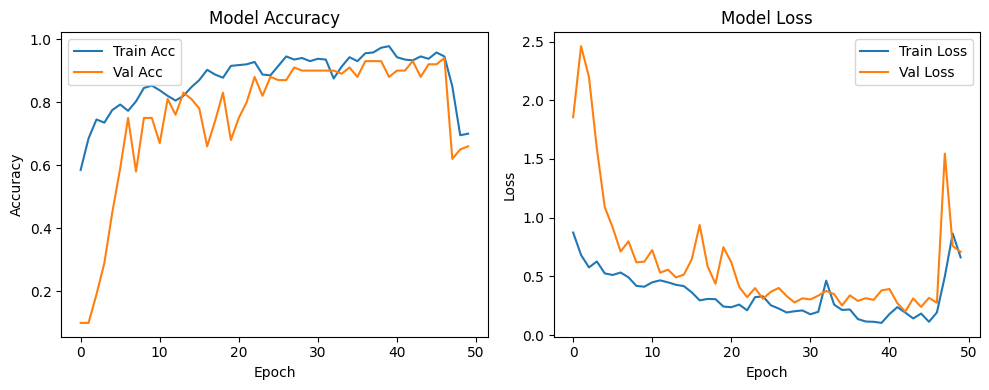

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_1dlstm.history['accuracy'], label='Train Acc')
plt.plot(history_1dlstm.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_1dlstm.history['loss'], label='Train Loss')
plt.plot(history_1dlstm.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 361ms/step


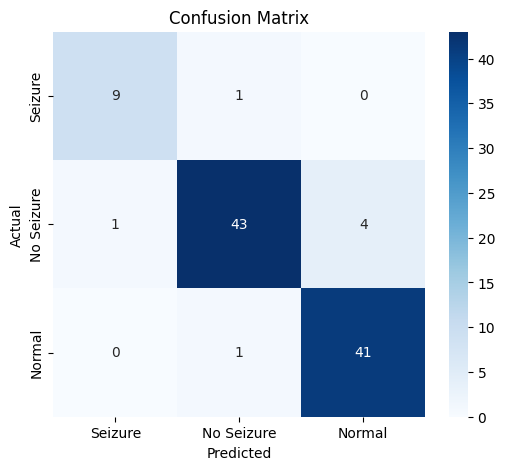

Classification Report:
              precision    recall  f1-score   support

     Seizure       0.90      0.90      0.90        10
  No Seizure       0.96      0.90      0.92        48
      Normal       0.91      0.98      0.94        42

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

# Predict on validation set
y_pred_probs = model_1dlstm.predict(xval_1dlstm)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(yval_1dlstm, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Seizure', 'No Seizure', 'Normal'],
            yticklabels=['Seizure', 'No Seizure', 'Normal'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Seizure', 'No Seizure', 'Normal']))


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 239ms/step
🧪 Test Accuracy: 93.00%


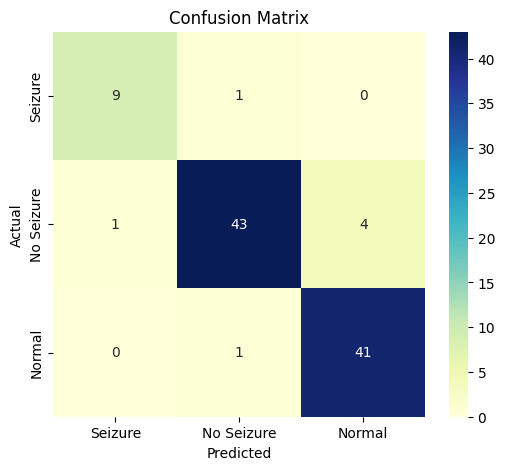

📋 Classification Report:
              precision    recall  f1-score   support

     Seizure       0.90      0.90      0.90        10
  No Seizure       0.96      0.90      0.92        48
      Normal       0.91      0.98      0.94        42

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test (validation) data
y_pred_probs = model_1dlstm.predict(xval_1dlstm)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(yval_1dlstm, axis=1)

# Accuracy
test_accuracy = np.mean(y_pred == y_true)
print(f"🧪 Test Accuracy: {test_accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Seizure', 'No Seizure', 'Normal'],
            yticklabels=['Seizure', 'No Seizure', 'Normal'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("📋 Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Seizure', 'No Seizure', 'Normal']))


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Get model predictions (probabilities)
y_pred_probs = model_1dlstm.predict(xval_1dlstm)

# 2. Convert probabilities to class indices
y_pred = np.argmax(y_pred_probs, axis=1)

# 3. Convert one-hot encoded yval to class indices
y_true = np.argmax(yval_1dlstm, axis=1)

# 4. Print accuracy
acc = accuracy_score(y_true, y_pred)
print("Validation Accuracy:", acc)

# 5. Print classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred))

# 6. Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

# 7. Optional: Print first 10 predicted vs actual
print("\nSample Predictions:")
for i in range(10):
    print(f"Sample {i+1}: Predicted = {y_pred[i]}, Actual = {y_true[i]}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 240ms/step
Validation Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.96      0.90      0.92        48
           2       0.91      0.98      0.94        42

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100

Confusion Matrix:
[[ 9  1  0]
 [ 1 43  4]
 [ 0  1 41]]

Sample Predictions:
Sample 1: Predicted = 1, Actual = 1
Sample 2: Predicted = 2, Actual = 2
Sample 3: Predicted = 1, Actual = 1
Sample 4: Predicted = 2, Actual = 2
Sample 5: Predicted = 2, Actual = 2
Sample 6: Predicted = 1, Actual = 1
Sample 7: Predicted = 1, Actual = 1
Sample 8: Predicted = 2, Actual = 2
Sample 9: Predicted = 2, Actual = 2
Sample 10: Predicted = 1, Actual = 1


In [ ]:
import numpy as np

# Example: testing with the first validation sample
new_sample = xval_1dlstm[0]  # shape (4098, 1)
new_sample = np.expand_dims(new_sample, axis=0)  # shape becomes (1, 4098, 1)

# Predict
prediction = model_1dlstm.predict(new_sample)
predicted_class = np.argmax(prediction)

# Interpret
class_names = ['Normal', 'No-Seizure Epilepsy', 'Seizure']
print("Predicted Class:", predicted_class)
print("Condition:", class_names[predicted_class])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
Predicted Class: 1
Condition: No-Seizure Epilepsy
